In [14]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

Taks: minimise $f = (1/2)  x^{T} M x$ subject to $A^{T} x = c$, where $M$ is SPD.

This requires finding the stationary points of
$$
\mathcal{L}(x, \lambda) = (1/2) x^{T} M x + \lambda^{T} (A^{T} x - c) 
$$
Note that
\begin{align}
 \frac{\partial \mathcal{L}}{\partial x} &= M x + A \lambda
 \\
 \frac{\partial \mathcal{L}}{\partial \lambda} &= A^{T} x - c
\end{align}

Setting the variations to zero, a linear system can be formed:
$$
\begin{bmatrix}
    M      & A \\
    A^{T}  & 0
\end{bmatrix}
\begin{bmatrix}
    x \\ \lambda
\end{bmatrix}
=
\begin{bmatrix}
    0 \\ c
\end{bmatrix}
$$


For $x \in \mathbb{R}^{2}$, $M = I$, $A^{T} = \begin{bmatrix} 2 & 3 \end{bmatrix}$, $c = 4$:

In [122]:
# M = np.eye(2)

M = np.array([[1, 0.5], [0.5, 2]])
print("M eigs:", np.linalg.eigvalsh(M))

At = np.array([[2, 3]])
K = np.block([[M, At.T], [At, 0]])
              
f = np.array([0, 0, 4])
print("K:\n", K)
print("f:\n", f)

print("K eigs:", np.linalg.eigvalsh(K))

M eigs: [0.79289322 2.20710678]
K:
 [[1.  0.5 2. ]
 [0.5 2.  3. ]
 [2.  3.  0. ]]
f:
 [0 0 4]
K eigs: [-2.69334484  0.84182756  4.85151728]


In [118]:
x = np.linalg.solve(K, f)
print(x)

[ 0.90909091  0.72727273 -0.63636364]


Check constrant:

In [119]:
np.dot(At, x[:2])

array([4.])

In [120]:
delta = 0.02
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)

Z0 = M[0, 0] * X + M[0, 1] * Y 
Z1 = M[1, 0] * X + M[1, 1] * Y 

Z = 0.5 * (X*Z0 + Y*Z1)

Z1 = 2*X + 3*Y 

<a list of 1 text.Text objects>

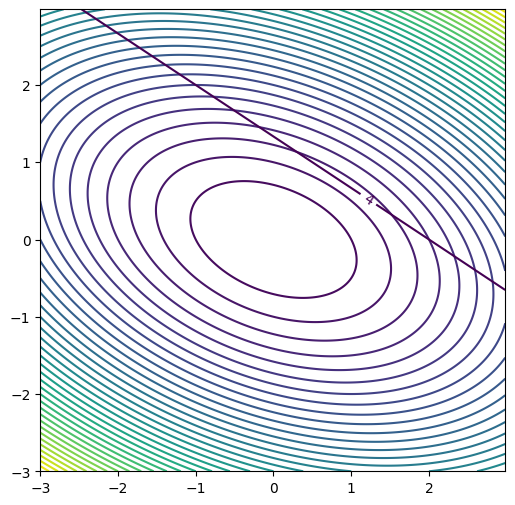

In [121]:
fig, ax = plt.subplots(figsize=(6,6))
CS = ax.contour(X, Y, Z, 40)
CS = ax.contour(X, Y, Z1, [4])
ax.clabel(CS, fontsize=10)

In [135]:
M = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
print("M eigs:", np.linalg.eigvalsh(M))

At = np.array([[0, 3, 7], 
              [2, 3, 0]])
K = np.block([[M, At.T], [At, np.zeros([2, 2])]])
              
f = np.array([0, 0, 0, 4, 2])
print("K:\n", K)
print("f:\n", f)

print("K eigs:", np.linalg.eigvalsh(K))

M eigs: [1. 1. 1.]
K:
 [[1. 0. 0. 0. 2.]
 [0. 1. 0. 3. 3.]
 [0. 0. 1. 7. 0.]
 [0. 3. 7. 0. 0.]
 [2. 3. 0. 0. 0.]]
f:
 [0 0 0 4 2]
K eigs: [-7.24488487 -2.89363498  1.          3.89363498  8.24488487]


In [134]:
x = np.linalg.solve(K, f)
print(x)

[ 0.23774146  0.50817236  0.35364042 -0.05052006 -0.11887073]
